In [32]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score


In [33]:
udemy_dataset = pd.read_csv("/Users/user/Downloads/udemy_courses 2.csv")
print('✔️ Dataset Imported Successfully!\n')
print('It contains {} rows and {} columns.'.format(udemy_dataset.shape[0], udemy_dataset.shape[1]))
print(udemy_dataset.head)            


✔️ Dataset Imported Successfully!

It contains 3678 rows and 12 columns.
<bound method NDFrame.head of       course_id                                       course_title  \
0       1070968                 Ultimate Investment Banking Course   
1       1113822  Complete GST Course & Certification - Grow You...   
2       1006314  Financial Modeling for Business Analysts and C...   
3       1210588  Beginner to Pro - Financial Analysis in Excel ...   
4       1011058       How To Maximize Your Profits Trading Options   
...         ...                                                ...   
3673     775618  Learn jQuery from Scratch - Master of JavaScri...   
3674    1088178  How To Design A WordPress Website With No Codi...   
3675     635248                      Learn and Build using Polymer   
3676     905096  CSS Animations: Create Amazing Effects on Your...   
3677     297602  Using MODX CMS to Build Websites: A Beginner's...   

                                                    url 

In [34]:
#print the tail of the csv
print(udemy_dataset.tail)

<bound method NDFrame.tail of       course_id                                       course_title  \
0       1070968                 Ultimate Investment Banking Course   
1       1113822  Complete GST Course & Certification - Grow You...   
2       1006314  Financial Modeling for Business Analysts and C...   
3       1210588  Beginner to Pro - Financial Analysis in Excel ...   
4       1011058       How To Maximize Your Profits Trading Options   
...         ...                                                ...   
3673     775618  Learn jQuery from Scratch - Master of JavaScri...   
3674    1088178  How To Design A WordPress Website With No Codi...   
3675     635248                      Learn and Build using Polymer   
3676     905096  CSS Animations: Create Amazing Effects on Your...   
3677     297602  Using MODX CMS to Build Websites: A Beginner's...   

                                                    url  is_paid  price  \
0     https://www.udemy.com/ultimate-investment-bank..

In [35]:
#print the info of the csv 
print(udemy_dataset.info)


<bound method DataFrame.info of       course_id                                       course_title  \
0       1070968                 Ultimate Investment Banking Course   
1       1113822  Complete GST Course & Certification - Grow You...   
2       1006314  Financial Modeling for Business Analysts and C...   
3       1210588  Beginner to Pro - Financial Analysis in Excel ...   
4       1011058       How To Maximize Your Profits Trading Options   
...         ...                                                ...   
3673     775618  Learn jQuery from Scratch - Master of JavaScri...   
3674    1088178  How To Design A WordPress Website With No Codi...   
3675     635248                      Learn and Build using Polymer   
3676     905096  CSS Animations: Create Amazing Effects on Your...   
3677     297602  Using MODX CMS to Build Websites: A Beginner's...   

                                                    url  is_paid  price  \
0     https://www.udemy.com/ultimate-investment-bank

In [36]:
#print the discription of the csv
print(udemy_dataset.describe)


<bound method NDFrame.describe of       course_id                                       course_title  \
0       1070968                 Ultimate Investment Banking Course   
1       1113822  Complete GST Course & Certification - Grow You...   
2       1006314  Financial Modeling for Business Analysts and C...   
3       1210588  Beginner to Pro - Financial Analysis in Excel ...   
4       1011058       How To Maximize Your Profits Trading Options   
...         ...                                                ...   
3673     775618  Learn jQuery from Scratch - Master of JavaScri...   
3674    1088178  How To Design A WordPress Website With No Codi...   
3675     635248                      Learn and Build using Polymer   
3676     905096  CSS Animations: Create Amazing Effects on Your...   
3677     297602  Using MODX CMS to Build Websites: A Beginner's...   

                                                    url  is_paid  price  \
0     https://www.udemy.com/ultimate-investment-ba

In [37]:
# droping unnecessary columns
udemy = udemy_dataset.drop(['course_id', 'url'], axis = 1)
# cheching the null values in the dataset
print(udemy.isnull())


      course_title  is_paid  price  num_subscribers  num_reviews  \
0            False    False  False            False        False   
1            False    False  False            False        False   
2            False    False  False            False        False   
3            False    False  False            False        False   
4            False    False  False            False        False   
...            ...      ...    ...              ...          ...   
3673         False    False  False            False        False   
3674         False    False  False            False        False   
3675         False    False  False            False        False   
3676         False    False  False            False        False   
3677         False    False  False            False        False   

      num_lectures  level  content_duration  published_timestamp  subject  
0            False  False             False                False    False  
1            False  False      

In [38]:
#printing the null values in each row
print(udemy.isnull().sum())


course_title           0
is_paid                0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
content_duration       0
published_timestamp    0
subject                0
dtype: int64


In [39]:
#printing the total null values in the csv
print(udemy.isnull().sum().sum())


0


In [40]:
#printing out the unique values in each column
print(udemy.nunique())

course_title           3663
is_paid                   2
price                    38
num_subscribers        2197
num_reviews             511
num_lectures            229
level                     4
content_duration        105
published_timestamp    3672
subject                   4
dtype: int64


In [41]:
#printing out duplicated row if there is any
print(udemy.duplicated())

0       False
1       False
2       False
3       False
4       False
        ...  
3673    False
3674    False
3675    False
3676    False
3677    False
Length: 3678, dtype: bool


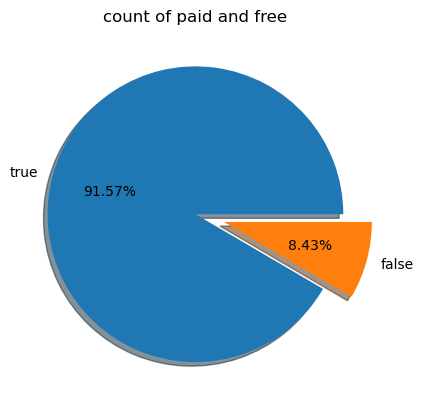

In [42]:
# count of paid and free
is_paid = udemy_dataset['is_paid'].value_counts()
label=['true','false']
plt.pie(is_paid.values,labels=label,autopct='%0.2f%%',shadow=True,explode=[0,0.2])
plt.title('count of paid and free')
plt.show()

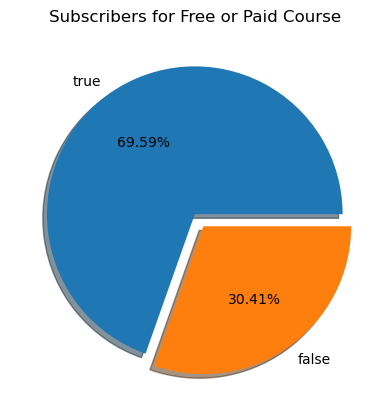

In [43]:
# subscribers for paid and free course
num_sub=udemy.groupby('is_paid')['num_subscribers'].sum().sort_values(ascending=False)
label=['true','false']
plt.pie(num_sub.values,labels=label,autopct='%0.2f%%',shadow=True,explode=[0,0.1])
plt.title('Subscribers for Free or Paid Course')
plt.show()

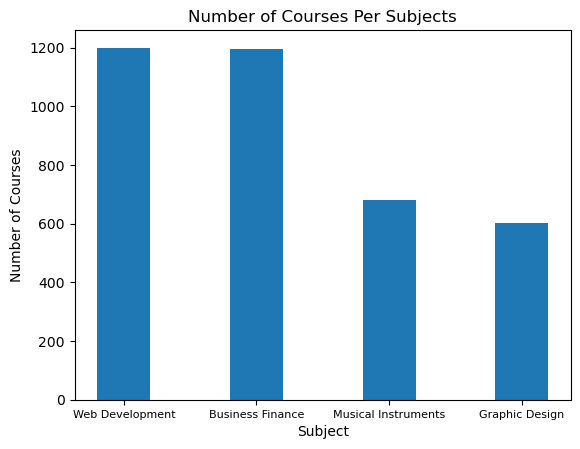

In [44]:
# number of course per subject
sub = udemy['subject'].value_counts()
plt.xlabel('Subject')
plt.ylabel('Number of Courses')
plt.title('Number of Courses Per Subjects')
plt.bar(sub.index,sub.values,width=0.4)
plt.xticks(fontsize=8)
plt.show()

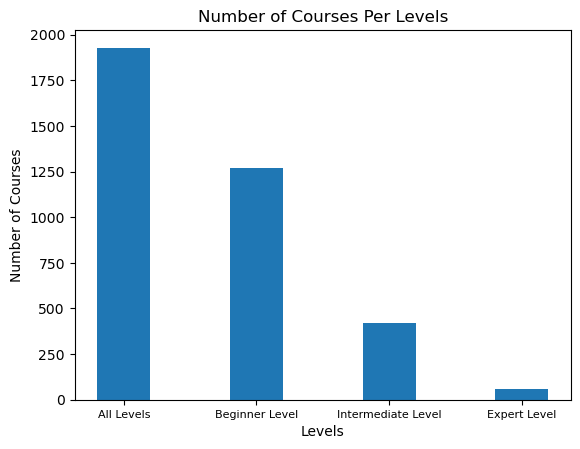

In [45]:
# number of course per level
level = udemy['level'].value_counts()
plt.xlabel('Levels')
plt.ylabel('Number of Courses')
plt.title('Number of Courses Per Levels')
plt.bar(level.index,level.values,width=0.4)
plt.xticks(fontsize=8)
plt.show()

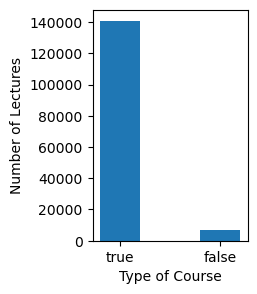

In [46]:
# which course has more lectures
num_lec=udemy.groupby('is_paid')['num_lectures'].sum().sort_values(ascending=False)
label=['true','false']
fig,ax=plt.subplots(figsize=(2,3))
ax.bar(label,num_lec.values,width=0.4)
plt.ylabel('Number of Lectures')
plt.xlabel('Type of Course')
plt.show()


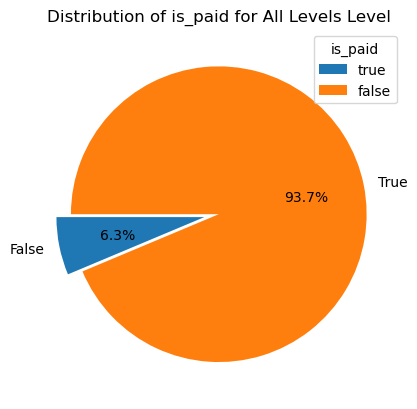

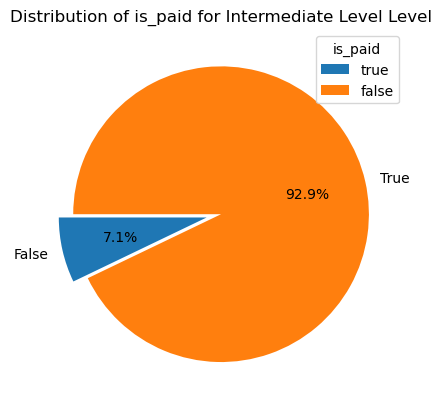

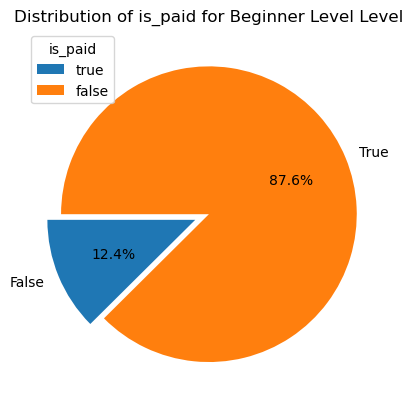

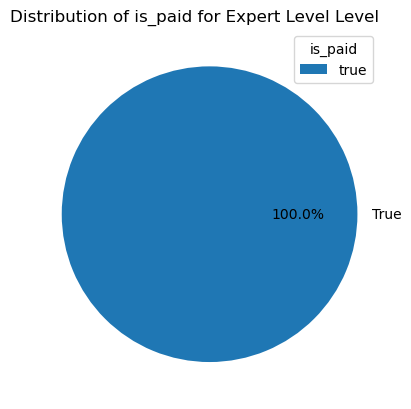

In [47]:
#distribution of the is_paid variable for each level 
levels = udemy['level'].unique()

for level in levels:
    is_paid = udemy[udemy['level'] == level].groupby('is_paid').size()
    num_slices = len(is_paid)
    explode = [0.1] + [0] * (num_slices - 1)  # Separate the first slice from the center
    plt.pie(is_paid, labels=is_paid.index, autopct='%0.1f%%', explode=explode, startangle=180)
    plt.legend(['true', 'false'], title='is_paid')
    plt.title(f'Distribution of is_paid for {level} Level')
    plt.show()


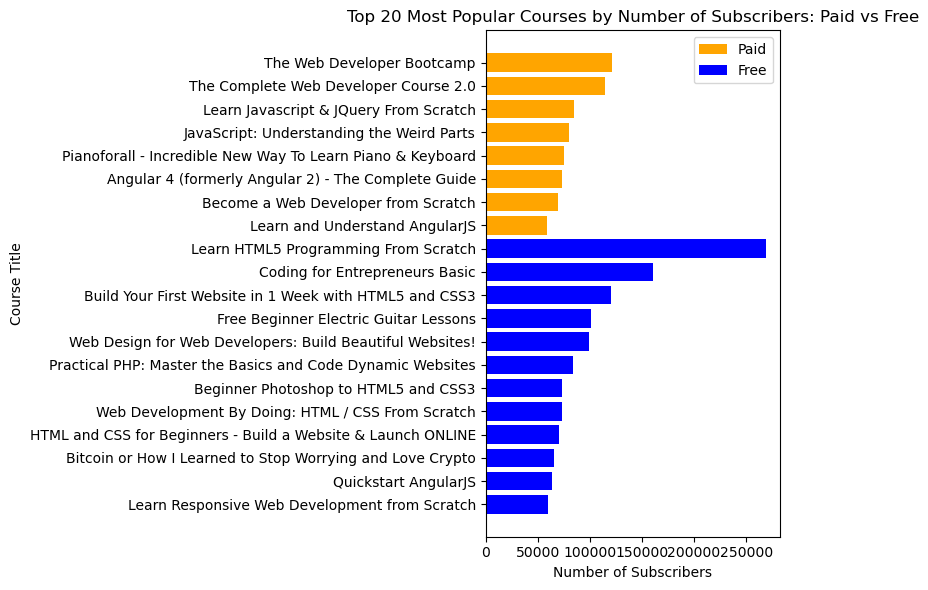

In [48]:
#Top 20 Most Popular Courses by Number of Subscribers: Paid vs Free
top_20_subscribers = udemy.nlargest(20,'num_subscribers')
plt.figure(figsize=(8, 6))
# Plotting paid courses
plt.barh(top_20_subscribers[top_20_subscribers['is_paid'] == True]['course_title'],
         top_20_subscribers[top_20_subscribers['is_paid'] == True]['num_subscribers'], color='orange', label='Paid')
# Plotting free courses
plt.barh(top_20_subscribers[top_20_subscribers['is_paid'] == False]['course_title'],
         top_20_subscribers[top_20_subscribers['is_paid'] == False]['num_subscribers'], color='blue', label='Free')
plt.xlabel('Number of Subscribers')
plt.ylabel('Course Title')
plt.title('Top 20 Most Popular Courses by Number of Subscribers: Paid vs Free')
plt.legend()
plt.gca().invert_yaxis()  # Invert the y-axis to have the course with the highest subscribers at the top
plt.tight_layout()

plt.show()


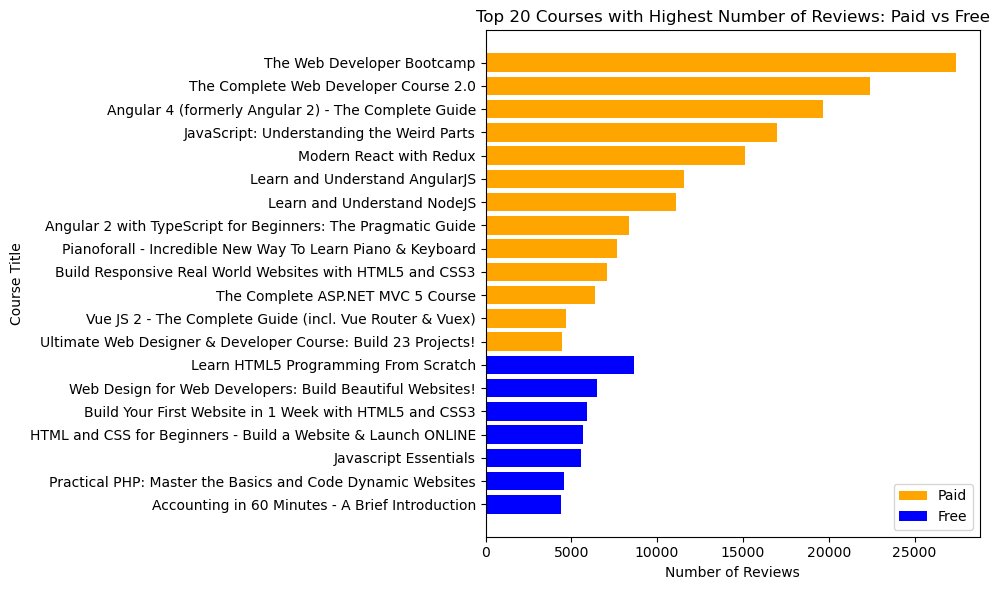

In [49]:
# Assuming you have a DataFrame 'udemy' with relevant data
top_20_reviews = udemy.nlargest(20, 'num_reviews')

plt.figure(figsize=(10, 6))

# Plotting paid courses
plt.barh(top_20_reviews[top_20_reviews['is_paid'] == True]['course_title'],
         top_20_reviews[top_20_reviews['is_paid'] == True]['num_reviews'], color='orange', label='Paid')

# Plotting free courses
plt.barh(top_20_reviews[top_20_reviews['is_paid'] == False]['course_title'],
         top_20_reviews[top_20_reviews['is_paid'] == False]['num_reviews'], color='blue', label='Free')

plt.xlabel('Number of Reviews')
plt.ylabel('Course Title')
plt.title('Top 20 Courses with Highest Number of Reviews: Paid vs Free')
plt.legend()
plt.gca().invert_yaxis()  # Invert the y-axis to have the course with the highest reviews at the top
plt.tight_layout()

plt.show()

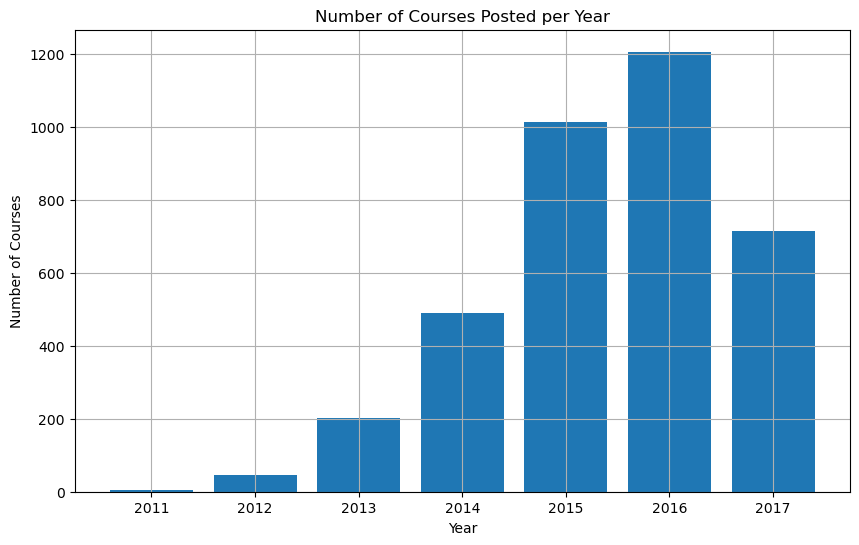

In [50]:
# Convert 'published_timestamp' column to datetime
#number of courses posted per year
udemy['published_timestamp'] = pd.to_datetime(udemy['published_timestamp'])
udemy['published_year'] = udemy['published_timestamp'].dt.year
year_counts = udemy['published_year'].value_counts()
year_counts = year_counts.sort_index()
# Plotting the data
plt.figure(figsize=(10, 6))
plt.bar(year_counts.index, year_counts.values)
plt.xlabel('Year')
plt.ylabel('Number of Courses')
plt.title('Number of Courses Posted per Year')
plt.grid(True)
plt.show()

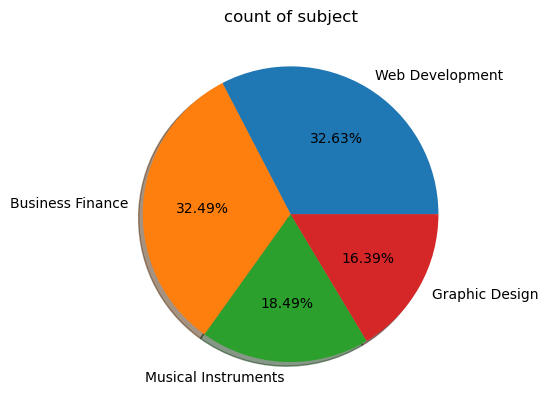

In [51]:
# count of subject
subject = udemy['subject'].value_counts()
#label=[subject]
plt.pie(subject.values,labels=subject.index,autopct='%0.2f%%',shadow=True)
plt.title('count of subject')
plt.show()

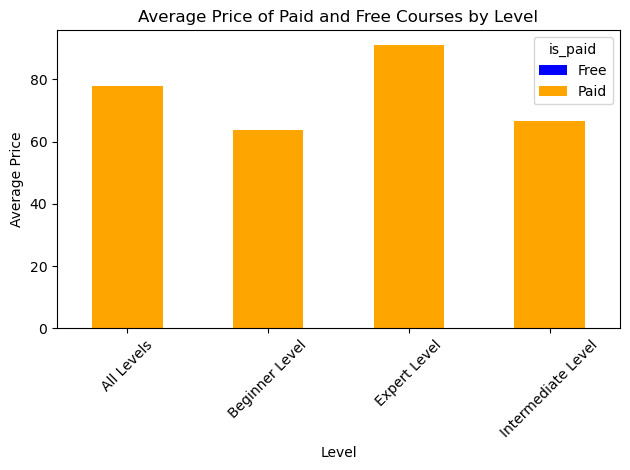

In [52]:
# Group data by level and calculate average price for each level and payment status
level_price = udemy.groupby(['level', 'is_paid'])['price'].mean().reset_index()

# Pivot the data for plotting
pivot_data = level_price.pivot(index='level', columns='is_paid', values='price')

# Plotting the data
pivot_data.plot(kind='bar', stacked=True, color= ['blue', 'orange'])
plt.xlabel('Level')
plt.ylabel('Average Price')
plt.title('Average Price of Paid and Free Courses by Level')
plt.xticks(rotation=45)
plt.legend(title='is_paid', labels=['Free', 'Paid'])
plt.tight_layout()
plt.show()

In [53]:
#outlier elimination
udemy=udemy[(udemy['num_subscribers']<2600)]
#Creating Five stars based bins
bins = ['-1','0','120','920','2200','2600']
labels = ['0','120','920','2200','2500']
udemy["Subscribers"] = pd.cut(udemy["num_subscribers"], bins=bins, labels=labels)
#outlier elimination
udemy=udemy[(udemy['num_lectures']<400)]
udemy=udemy[(udemy['content_duration']<40)]

In [54]:
# Initialize the label encoder
encode = LabelEncoder()
udemy['level'] = encode.fit_transform(udemy['level'])
udemy['subject'] = encode.fit_transform(udemy['subject'])
udemy['course_title'] = encode.fit_transform(udemy['course_title'])
print('✔️ Features Encoded!')
print

✔️ Features Encoded!


<function print>

/var/folders/q6/v17312c94b3gc98vt17wv7w00000gn/T/ipykernel_42190/3204374676.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(udemy.corr(),annot=True,cmap=colormap)


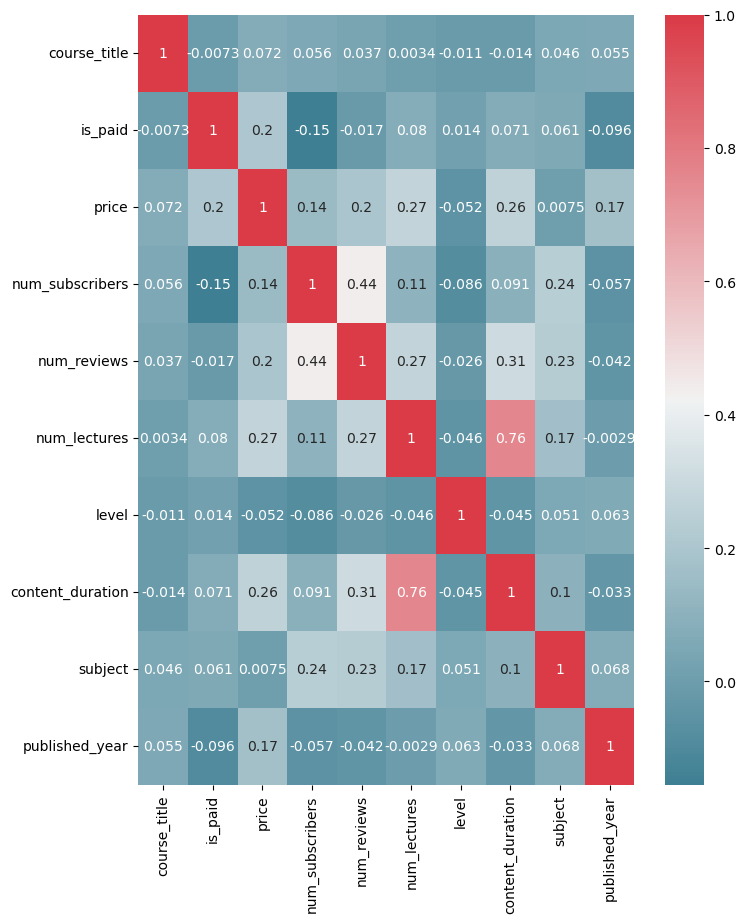

In [55]:
udemy.content_duration=udemy['content_duration'].apply(lambda x: int(np.floor(x)))

#showing the correlations of each of the columns with price
def correlation_heatmap(df):
    _,ax=plt.subplots(figsize=(8,10))
    colormap=sns.diverging_palette(220,10,as_cmap=True)
    sns.heatmap(udemy.corr(),annot=True,cmap=colormap)

correlation_heatmap(udemy)

In [56]:
# Drop irrelavant columns
udemy.drop(["published_timestamp", "Subscribers"],axis=1,inplace=True)
print('✔️ successful!')
print(udemy.head)

✔️ successful!
<bound method NDFrame.head of       course_title  is_paid  price  num_subscribers  num_reviews  \
0             2554     True    200             2147           23   
2              904     True     45             2174           74   
3              345     True     95             2451           11   
4             1177     True    200             1276           45   
6             1421     True     65             1540          178   
...            ...      ...    ...              ...          ...   
3673          1679     True    100             1040           14   
3674          1171     True     25              306            3   
3675          1668     True     40              513          169   
3676           520     True     50              300           31   
3677          2568     True     45              901           36   

      num_lectures  level  content_duration  subject  published_year  
0               51      0                 1        0            201

In [72]:
x = udemy[["num_lectures", "subject", "level", "num_subscribers", "num_reviews"]]
y = udemy["is_paid"]
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

from imblearn.over_sampling import SMOTE
# Apply SMOTE
over = SMOTE(sampling_strategy='auto', random_state=0)
x_train, y_train = over.fit_resample(x_train, y_train)

print(y_train.value_counts())

True     2149
False    2149
Name: is_paid, dtype: int64


focusing on precision as my primary evaluation metric. Precision is particularly important in this context because i want to avoid falsely classifying a course as paid when it's actually free. This could potentially deter users from enrolling in the course.

I want to ensure that the courses i label as paid are more likely to be accurate, reducing the chances of users encountering unnecessary barriers to accessing the courses. precision aligns well with my goal of providing accurate pricing predictions for Udemy courses.

ACCURACY: 0.7251356238698011


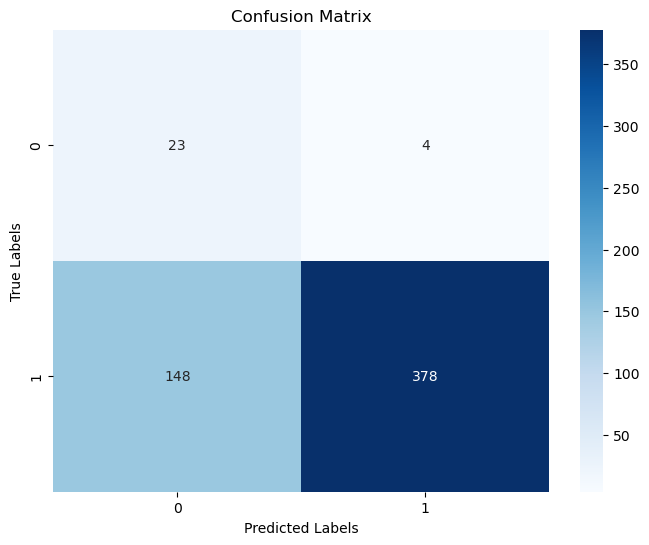

Precision: 0.9895287958115183
Recall: 0.7186311787072244
F1-Score: 0.8325991189427312


In [87]:
model = LogisticRegression()
model.fit(x_train,y_train)

y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("ACCURACY:", accuracy)
print("=" * 50)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

# Assuming y_true contains the true class labels and y_pred contains the predicted class labels
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)